In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from multi_otsu_thresholding import *

In [59]:
cv2.__version__

'3.4.0'

Load the initial greyscale image and show it

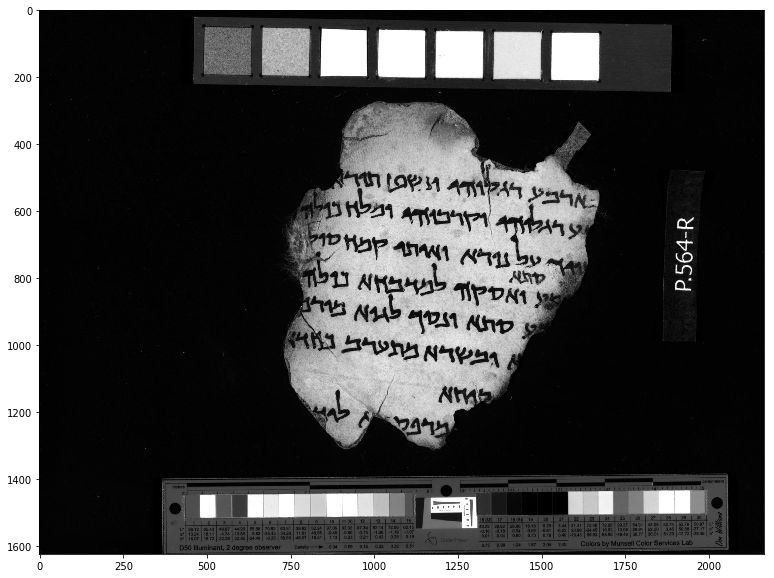

In [60]:
image = cv2.imread('image-data/test17.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

Threshold the image for binarization

In [61]:
#otsu_image = multi_otsu_thresholding(image)
#thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#thresh_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 0)
#thresh_image = 255 - image
thresh_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 10)
thresh_image = 255 - thresh_image

thresh_image = cv2.Canny(image,0,255)
thresh_image = cv2.GaussianBlur(thresh_image,(15,15),0)

Show the thresholded image


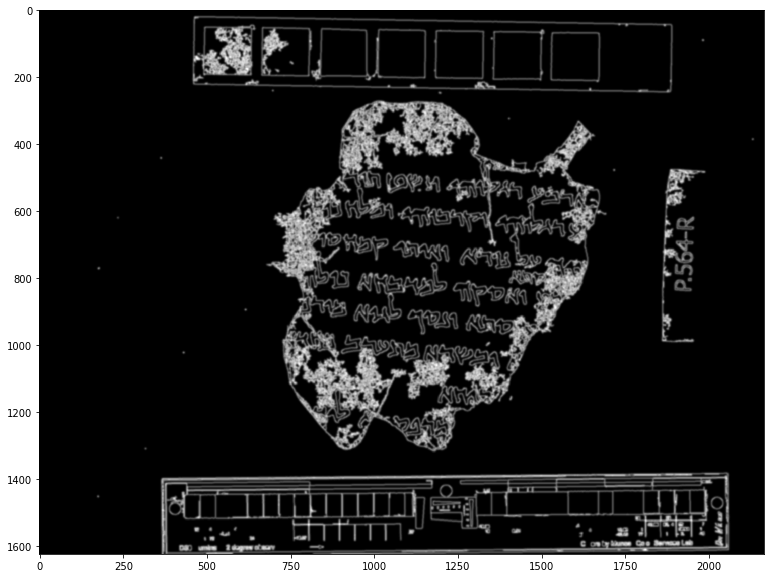

In [62]:
plt.figure(figsize = (500,10))
plt.imshow(thresh_image, cmap='gray')
plt.show()

Find the connected components of the binary image

In [63]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh_image, 8, cv2.CV_32S)
area = stats[:,4]
print(stats)
n_labels


[[      0       0    2165    1624 2593148]
 [    453      13    1444     243   83396]
 [    658      45     504     172   32408]
 [   1344      53     171     163    8838]
 [   1522      60     159     161    8384]
 [   1975      82      16      17     224]
 [    743     147      23      21     348]
 [    674     264    1026    1060  442478]
 [   1396     316      15      15     201]
 [   2124     378      15      15     201]
 [    357     434      16      16     212]
 [   1854     469     141     528   31838]
 [   1709     470      17      16     222]
 [   1031     480     173      73    9375]
 [    228     612      16      16     198]
 [    934     683     297     257   33320]
 [   1251     703     163      76    8089]
 [    170     762      17      17     247]
 [    609     886      16      17     220]
 [   1095     888     162      86    8660]
 [   1329     986      24      23     407]
 [    424    1014      16      17     220]
 [   1399    1147      20      23     359]
 [    311  

37

Filter out the components with a small area

In [64]:
filtered_components = []
threshold = 8000
for i in range(len(area)):
    if(area[i] > threshold):
        filtered_components.append(i)
filtered_components

[0, 1, 2, 3, 4, 7, 11, 13, 15, 16, 19, 24]

Find the component that contains the parchment

In [65]:
height, width = thresh_image.shape
area_threshold = 0.5 * height * width
print(area_threshold)
biggest_area = 0
best_component = 0

for component in filtered_components:
    if(area[component] < area_threshold and area[component] > biggest_area):
        biggest_area = area[component]
        best_component = component
        

best_component

1757980.0


7

Set selected component to white, everything else to black

In [66]:
for i in range(height):
    for j in range(width):
        if(labels[i][j] == best_component):
            thresh_image[i][j] = 255
        else:
             thresh_image[i][j] = 0
      

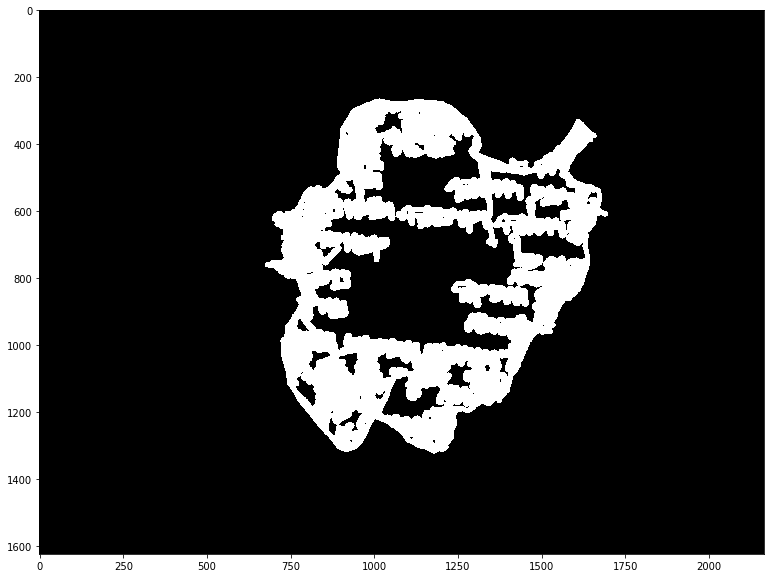

In [67]:
plt.figure(figsize = (500,10))
plt.imshow(thresh_image, cmap='gray')
plt.show()

Extract the parchment from the image

In [68]:
parchment_stats = stats[best_component,:]
parchment_stats

array([   674,    264,   1026,   1060, 442478], dtype=int32)

In [69]:
x = parchment_stats[0]

In [70]:
y = parchment_stats[1]

In [71]:
width = parchment_stats[2]

In [72]:
height = parchment_stats[3]

In [73]:
parchment = image[y:y+height, x:x+width]

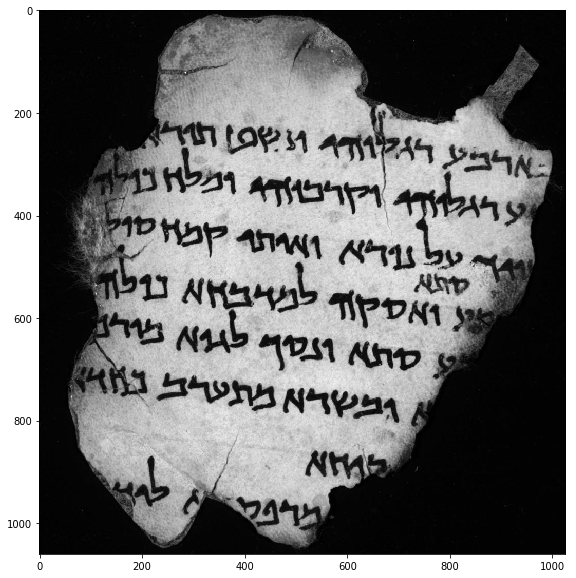

In [74]:
plt.figure(figsize = (500,10))
plt.imshow(parchment, cmap='gray')
plt.show()

# 